In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart=pd.read_csv("C:\\Users\\priyanka reddy\\Downloads\\heart.csv")

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.shape

(303, 14)

In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart.notnull().sum()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

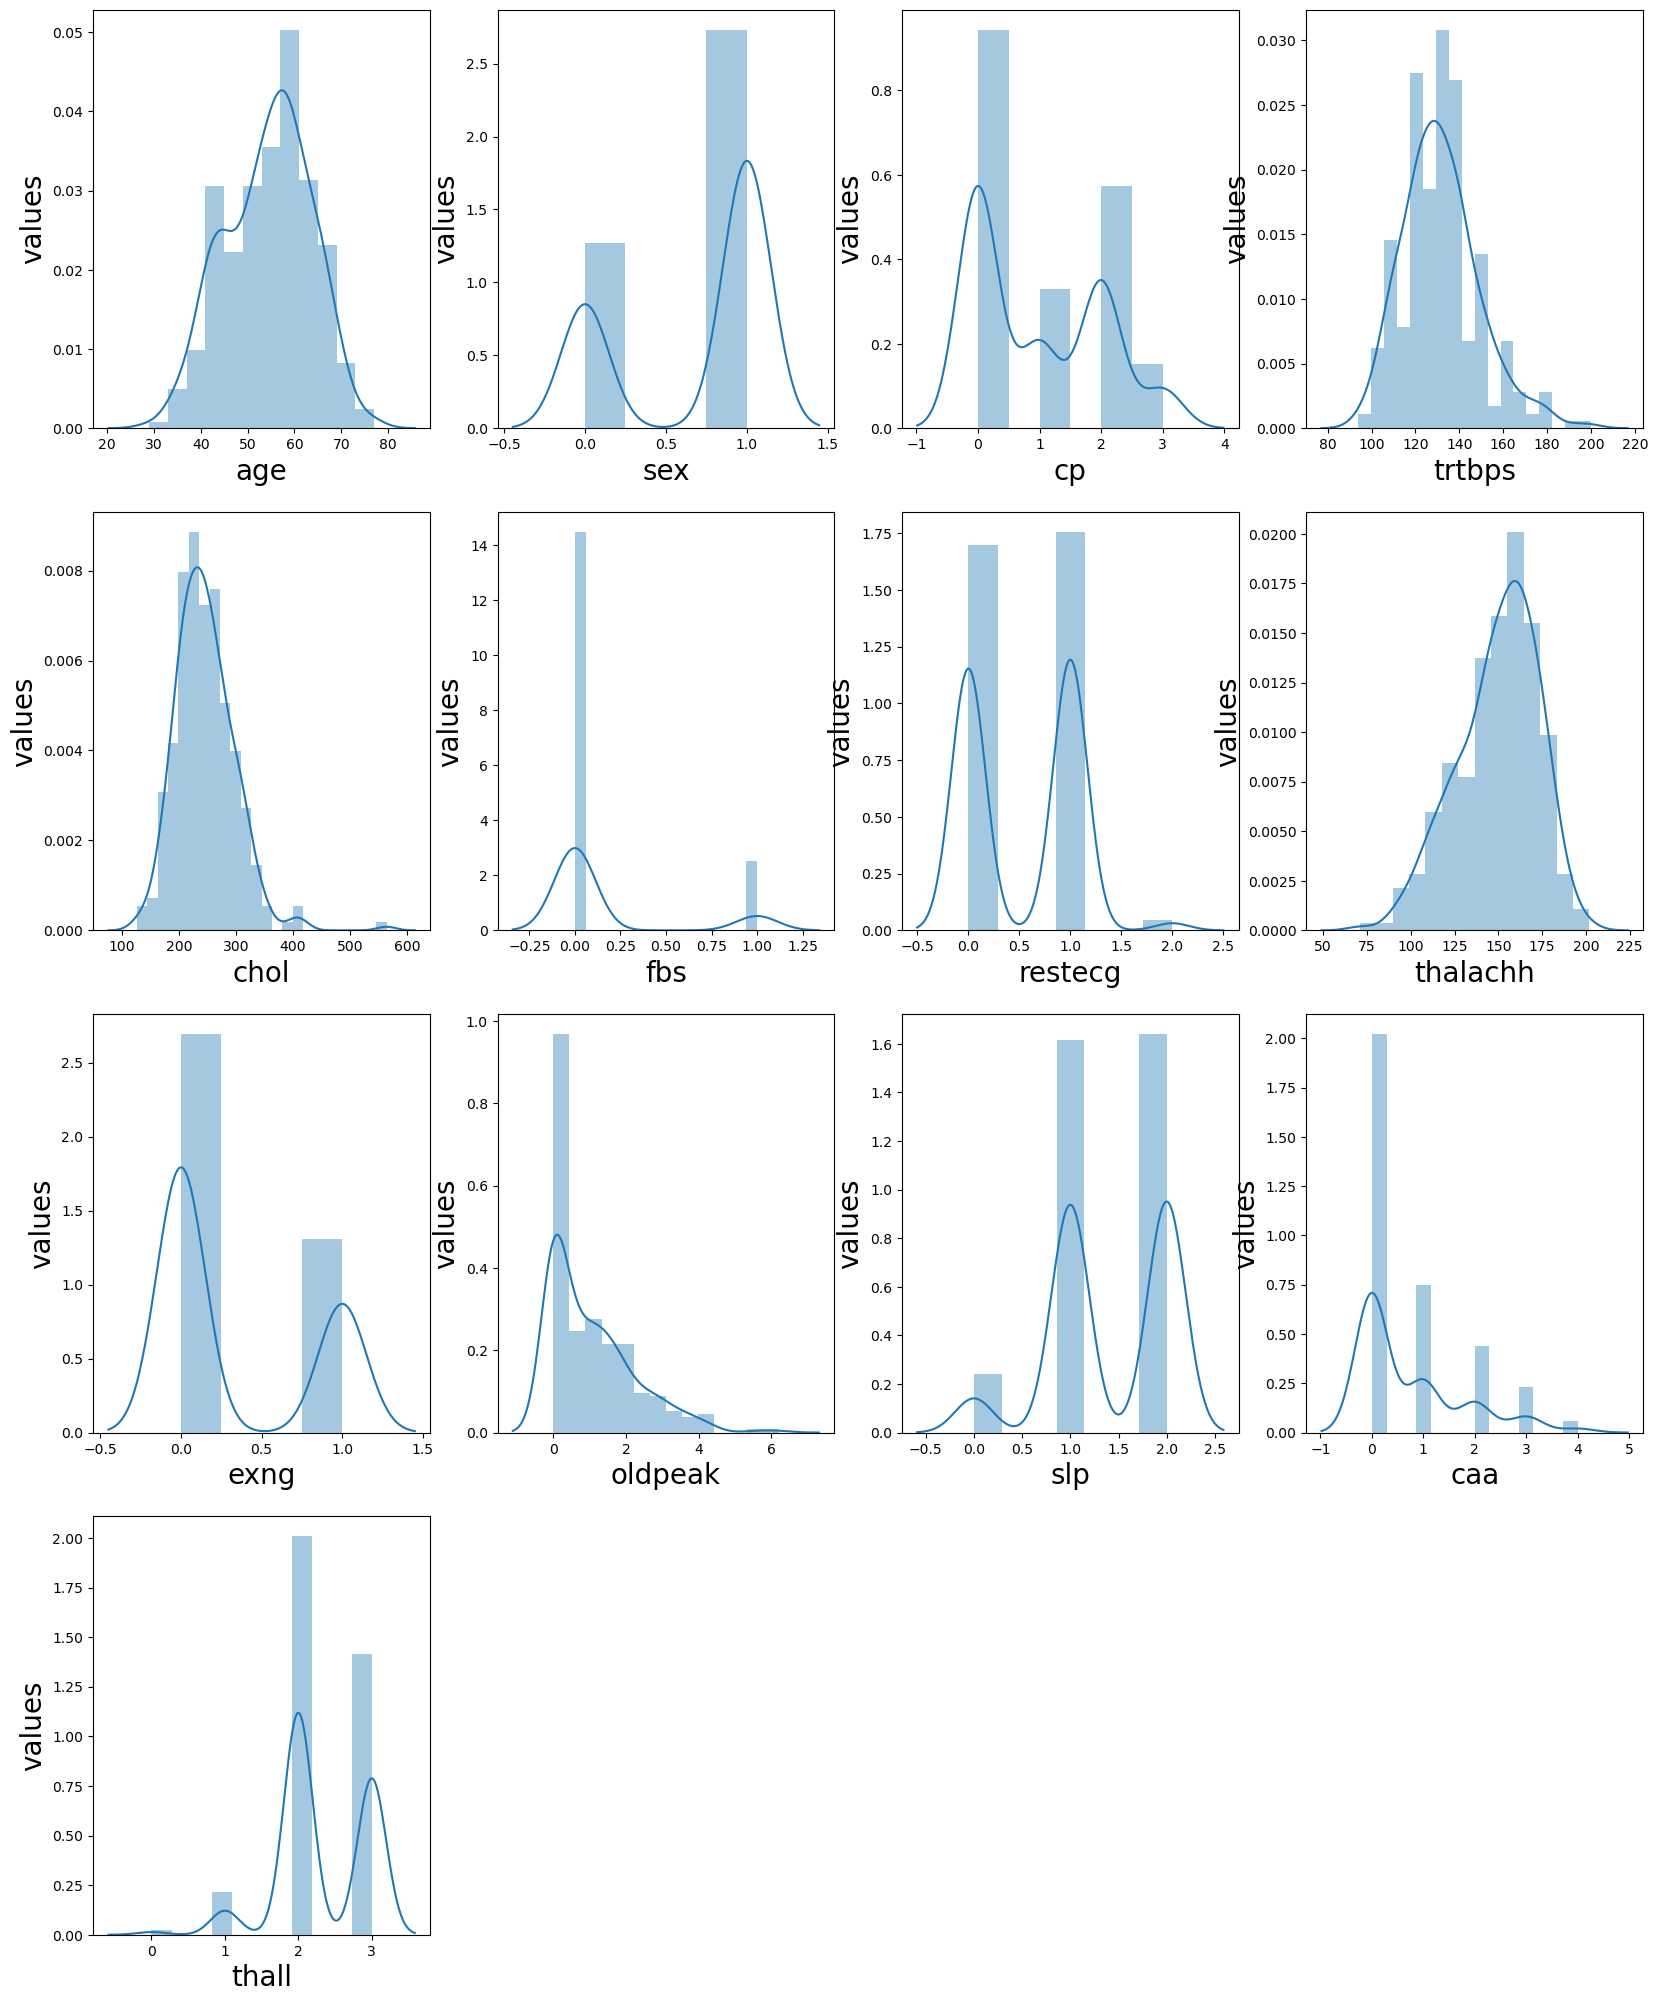

In [9]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in heart:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('values',fontsize=20)
    plotnumber+=1
plt.show()

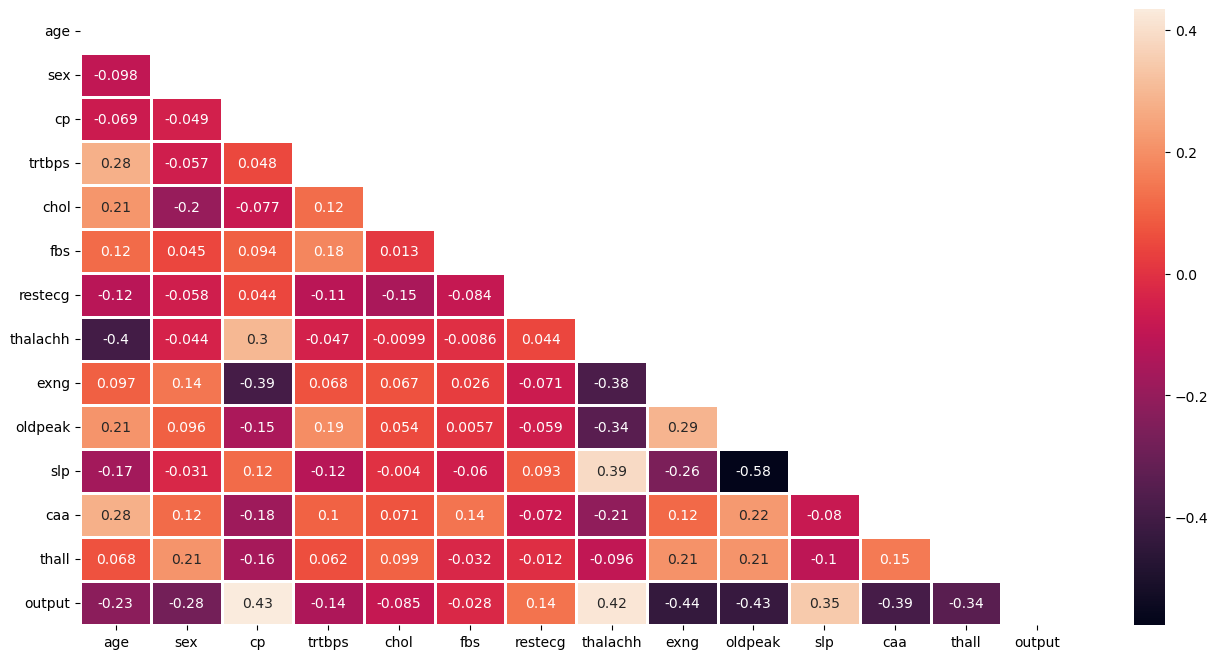

In [10]:
plt.figure(figsize=(16,8))
corr=heart.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, annot= True, fmt=".2g",linewidths=1)
plt.show()

In [11]:
heart.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

In [12]:
heart['trtbps']=np.log(heart['trtbps'])
heart['chol']=np.log(heart['chol'])
heart['thalachh']=np.log(heart['thalachh'])

np.var(heart[["trtbps",'chol','thalachh']])

trtbps      0.016894
chol        0.041401
thalachh    0.027054
dtype: float64

In [13]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [14]:
x = heart.drop('output',axis=1)
y=heart['output']
print(x.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=123)

# Decision TreeClassifier

In [16]:
accuracies={}

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3 = accuracy_score(y_test, y_pred3)

accuracies['DecisionTreeClassifier'] = acc3 * 100

print("Accuracy on test data:", acc3 * 100, "%")


Accuracy on test data: 76.92307692307693 %


In [17]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))
print("calssification report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[32 13]
 [ 8 38]]
calssification report               precision    recall  f1-score   support

           0       0.80      0.71      0.75        45
           1       0.75      0.83      0.78        46

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



# RandomForestClassification

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini',max_depth = 7, max_features = 'sqrt',min_samples_leaf = 2, min_samples_split=3)
rfc.fit(x_train,y_train)
y_pred5= rfc.predict(x_test)
acc5 = accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier'] = acc5*100
accuracy_score(y_train,rfc.predict(x_train))
print("Accuracy score is:",accuracy_score(y_test,y_pred3)*100,"%")

Accuracy score is: 76.92307692307693 %


In [19]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))
print("calssification report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[33 12]
 [ 7 39]]
calssification report               precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.76      0.85      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



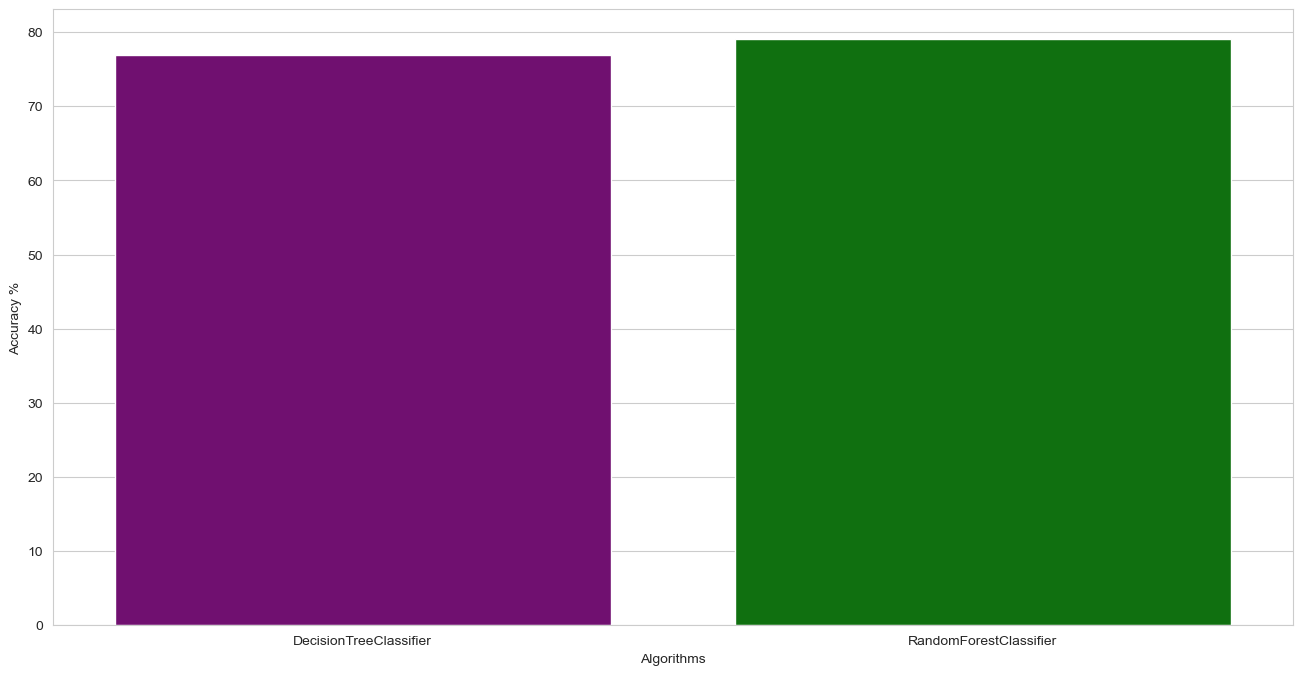

In [20]:
colors=['purple','green','blue','black','orange']
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()),y = list(accuracies.values()),palette=colors)
plt.show()

In [21]:
import pickle

In [22]:
with open('heart.pkl', 'wb') as f:
    pickle.dump(rfc, f)